## Image Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os
import pickle

# Read in Data

In [13]:
data = pd.read_csv("labelled_floorplan_dataset_updated.csv")

In [14]:
data

,key,label
0,006a2d3bb2b7435fb6d96e7f320efe42,-1.0
1,00e22bea176c4792a53d5132364ecd52,1.0
2,01bd5ab8fa0c4a7ab183f9f30f8c9a3a,-1.0
3,01c1ac1113dc4770a2690dc9e7218859,-1.0
4,034515138be34df3a780bb878eda204d,1.0
...,...,...
3408,0c5ebff3c81849faa7116d1379a6f975,-1.0
3409,0c63ab679de6427cbdbb05f1ba841204,-1.0
3410,0c655ec5de1845ee9981d156a46a827b,-1.0
3411,0c65e370201249aab3a237a30b96aad8,-1.0


# Update Data with Path

In [15]:
def image_path(key):
    return f"Total_Images/{key}/{key}_Top.png"

data['image_path'] = data['key'].apply(image_path)

In [16]:
data

,key,label,image_path
0,006a2d3bb2b7435fb6d96e7f320efe42,-1.0,Total_Images/006a2d3bb2b7435fb6d96e7f320efe42/...
1,00e22bea176c4792a53d5132364ecd52,1.0,Total_Images/00e22bea176c4792a53d5132364ecd52/...
2,01bd5ab8fa0c4a7ab183f9f30f8c9a3a,-1.0,Total_Images/01bd5ab8fa0c4a7ab183f9f30f8c9a3a/...
3,01c1ac1113dc4770a2690dc9e7218859,-1.0,Total_Images/01c1ac1113dc4770a2690dc9e7218859/...
4,034515138be34df3a780bb878eda204d,1.0,Total_Images/034515138be34df3a780bb878eda204d/...
...,...,...,...
3408,0c5ebff3c81849faa7116d1379a6f975,-1.0,Total_Images/0c5ebff3c81849faa7116d1379a6f975/...
3409,0c63ab679de6427cbdbb05f1ba841204,-1.0,Total_Images/0c63ab679de6427cbdbb05f1ba841204/...
3410,0c655ec5de1845ee9981d156a46a827b,-1.0,Total_Images/0c655ec5de1845ee9981d156a46a827b/...
3411,0c65e370201249aab3a237a30b96aad8,-1.0,Total_Images/0c65e370201249aab3a237a30b96aad8/...


In [ ]:
#data.to_csv(r'D:\School\Steelcase Capstone\floorplan_dataset.csv')

# Preprocess Data for Embedding

In [17]:
data['image'] = data['image_path'].map(lambda x: np.asarray(Image.open(x).resize((224,224)).convert('RGB'))) #.convert('L') for greyscale #.convert('RGB') for Color

In [18]:
data['image'] = [arr.astype(np.int16) for arr in data['image']]  #int16  #int8

In [19]:
data

,key,label,image_path,image
0,006a2d3bb2b7435fb6d96e7f320efe42,-1.0,Total_Images/006a2d3bb2b7435fb6d96e7f320efe42/...,"[[[128, 128, 128], [128, 128, 128], [128, 128,..."
1,00e22bea176c4792a53d5132364ecd52,1.0,Total_Images/00e22bea176c4792a53d5132364ecd52/...,"[[[128, 128, 128], [128, 128, 128], [128, 128,..."
2,01bd5ab8fa0c4a7ab183f9f30f8c9a3a,-1.0,Total_Images/01bd5ab8fa0c4a7ab183f9f30f8c9a3a/...,"[[[128, 128, 128], [128, 128, 128], [128, 128,..."
3,01c1ac1113dc4770a2690dc9e7218859,-1.0,Total_Images/01c1ac1113dc4770a2690dc9e7218859/...,"[[[128, 128, 128], [128, 128, 128], [128, 128,..."
4,034515138be34df3a780bb878eda204d,1.0,Total_Images/034515138be34df3a780bb878eda204d/...,"[[[128, 128, 128], [128, 128, 128], [128, 128,..."
...,...,...,...,...
3408,0c5ebff3c81849faa7116d1379a6f975,-1.0,Total_Images/0c5ebff3c81849faa7116d1379a6f975/...,"[[[128, 128, 128], [128, 128, 128], [128, 128,..."
3409,0c63ab679de6427cbdbb05f1ba841204,-1.0,Total_Images/0c63ab679de6427cbdbb05f1ba841204/...,"[[[128, 128, 128], [128, 128, 128], [128, 128,..."
3410,0c655ec5de1845ee9981d156a46a827b,-1.0,Total_Images/0c655ec5de1845ee9981d156a46a827b/...,"[[[128, 128, 128], [128, 128, 128], [128, 128,..."
3411,0c65e370201249aab3a237a30b96aad8,-1.0,Total_Images/0c65e370201249aab3a237a30b96aad8/...,"[[[128, 128, 128], [128, 128, 128], [128, 128,..."


In [20]:
#data.to_csv(r'D:\School\Steelcase Capstone\floorplan_dataset_renewed.csv')

In [ ]:
plt.imshow(data.image[3024])

## VGG Imports

In [ ]:
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from tqdm import tqdm

## List of extraction points:
* block1_conv1
* block1_conv2
* block1_pool
* block2_conv1
* block2_conv2
* block2_pool
* block3_conv1
* block3_conv2
* block3_conv3
* block3_conv4
* block3_pool
* block4_conv1
* block4_conv2
* block4_conv3
* block4_conv4
* block4_pool
* block5_conv1
* block5_conv2
* block5_conv3
* block5_conv4
* block5_pool

## Load the VGG-19 model pre-trained on ImageNet data, excluding the top classification layer and choose the layer to get the embeddings

In [21]:
base_model = VGG19(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

## Functions to preprocess the image and return the embedding as well as to process a list of images

In [22]:
def get_embedding(model, pil_img):
    if pil_img.size != (224, 224):
        pil_img = pil_img.resize((224, 224))#, Image.ANTIALIAS)
    img_data = np.array(pil_img)
    img_data = preprocess_input(img_data)

    embedding_vector = model.predict(np.expand_dims(img_data, axis=0))

    embedding_vector_flatten = embedding_vector.flatten()
    return embedding_vector_flatten

def process_images(image_list, model, batch_size=32):
    embeddings = []
    
    for i in tqdm(range(0, len(image_list), batch_size)):
        batch = image_list[i:i+batch_size]
        batch_images = [np.array(img) for img in batch]
        batch_images = np.array(batch_images)
        batch_images = preprocess_input(batch_images)
        
        batch_embeddings = model.predict(batch_images)
    
        for embedding in batch_embeddings:
            embeddings.append(embedding.flatten())
    
    return embeddings

In [12]:
embeddings = process_images(data.image, model, batch_size=32)

  0%|                                                                                          | 0/107 [00:00<?, ?it/s]


ValueError: could not convert string to float: '[[[128 128 128]\n  [128 128 128]\n  [128 128 128]\n  ...\n  [128 128 128]\n  [128 128 128]\n  [128 128 128]]\n\n [[128 128 128]\n  [128 128 128]\n  [128 128 128]\n  ...\n  [128 128 128]\n  [128 128 128]\n  [128 128 128]]\n\n [[128 128 128]\n  [128 128 128]\n  [128 128 128]\n  ...\n  [128 128 128]\n  [128 128 128]\n  [128 128 128]]\n\n ...\n\n [[128 128 128]\n  [128 128 128]\n  [128 128 128]\n  ...\n  [128 128 128]\n  [128 128 128]\n  [128 128 128]]\n\n [[128 128 128]\n  [128 128 128]\n  [128 128 128]\n  ...\n  [128 128 128]\n  [128 128 128]\n  [128 128 128]]\n\n [[128 128 128]\n  [128 128 128]\n  [128 128 128]\n  ...\n  [128 128 128]\n  [128 128 128]\n  [128 128 128]]]'

In [ ]:
t_1 = type(embeddings)
l_1 = len(embeddings)
t_2 = type(embeddings[10])
l_2 = len(embeddings[10])
print('Type of embeddings:',t_1)
print('Length of embeddings:',l_1)
print('Type of embedding instance:',t_2)
print('Length of embedding instance:',l_2)

## Classification Imports

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## KNN

In [ ]:
labels = pd.read_csv("labelled_floorplan_dataset_updated.csv")

In [ ]:
embeddings = np.array(embeddings)
label_int = np.array(labels.iloc[:,1].values.astype(int))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, label_int, test_size=0.2, random_state=42)

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

## XGBoost

In [ ]:
# Needed because XGBoost expects either a 0 or 1
labels_mapped = np.where(labels == -1, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels_mapped, test_size=0.2, random_state=42)

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# 2-Layer FFN

In [ ]:
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(label_int)

labels_categorical = to_categorical(labels_encoded) # One-Hot encoding

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels_categorical, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(y_train.shape[1], activation='softmax')) 

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',               
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=26, batch_size=32, verbose=1, validation_split=0.1)

scores = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_true_classes, y_pred_classes))
print(f"Accuracy: {scores[1]}")

# Convert Embeddings to DataFrame

In [ ]:
embeddings_df_2 = pd.DataFrame(embeddings)

In [ ]:
embeddings_df_2

# Saving Embeddings as .csv File

In [ ]:
#embeddings_df.to_csv(r'D:\School\Steelcase Capstone\Embeddings.csv')

### Checking data after reading it back in

In [3]:
embeddings_df = pd.read_csv('Embeddings.csv',index_col=0)

In [4]:
embed_df_nump = embeddings_df.to_numpy()
embed_df_nump

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.0518014,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [ ]:
embed_df_nump_2 = embeddings_df_2.to_numpy()
embed_df_nump_2

In [ ]:
print(embed_df_nump.shape)  # After reading back from CSV
print(embed_df_nump_2.shape)  # Before CSV conversion

# Testing Streamlit Functions

### Imports for Streamlit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os
import pickle
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.image as mpimg

In [25]:
old_data = pd.read_csv('floorplan_dataset.csv')
old_data

,Unnamed: 0,key,label,image_path,image
0,0,006a2d3bb2b7435fb6d96e7f320efe42,-1.0,Total_Images/006a2d3bb2b7435fb6d96e7f320efe42/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
1,1,00e22bea176c4792a53d5132364ecd52,1.0,Total_Images/00e22bea176c4792a53d5132364ecd52/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
2,2,01bd5ab8fa0c4a7ab183f9f30f8c9a3a,-1.0,Total_Images/01bd5ab8fa0c4a7ab183f9f30f8c9a3a/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
3,3,01c1ac1113dc4770a2690dc9e7218859,-1.0,Total_Images/01c1ac1113dc4770a2690dc9e7218859/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
4,4,034515138be34df3a780bb878eda204d,1.0,Total_Images/034515138be34df3a780bb878eda204d/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
...,...,...,...,...,...
3408,3408,0c5ebff3c81849faa7116d1379a6f975,-1.0,Total_Images/0c5ebff3c81849faa7116d1379a6f975/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
3409,3409,0c63ab679de6427cbdbb05f1ba841204,-1.0,Total_Images/0c63ab679de6427cbdbb05f1ba841204/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
3410,3410,0c655ec5de1845ee9981d156a46a827b,-1.0,Total_Images/0c655ec5de1845ee9981d156a46a827b/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
3411,3411,0c65e370201249aab3a237a30b96aad8,-1.0,Total_Images/0c65e370201249aab3a237a30b96aad8/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...


In [41]:
new_data = pd.read_csv('floorplan_dataset_renewed.csv',sep=',')
new_data

,Unnamed: 0,key,label,image_path,image
0,0,006a2d3bb2b7435fb6d96e7f320efe42,-1.0,Total_Images/006a2d3bb2b7435fb6d96e7f320efe42/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
1,1,00e22bea176c4792a53d5132364ecd52,1.0,Total_Images/00e22bea176c4792a53d5132364ecd52/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
2,2,01bd5ab8fa0c4a7ab183f9f30f8c9a3a,-1.0,Total_Images/01bd5ab8fa0c4a7ab183f9f30f8c9a3a/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
3,3,01c1ac1113dc4770a2690dc9e7218859,-1.0,Total_Images/01c1ac1113dc4770a2690dc9e7218859/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
4,4,034515138be34df3a780bb878eda204d,1.0,Total_Images/034515138be34df3a780bb878eda204d/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
...,...,...,...,...,...
3408,3408,0c5ebff3c81849faa7116d1379a6f975,-1.0,Total_Images/0c5ebff3c81849faa7116d1379a6f975/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
3409,3409,0c63ab679de6427cbdbb05f1ba841204,-1.0,Total_Images/0c63ab679de6427cbdbb05f1ba841204/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
3410,3410,0c655ec5de1845ee9981d156a46a827b,-1.0,Total_Images/0c655ec5de1845ee9981d156a46a827b/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...
3411,3411,0c65e370201249aab3a237a30b96aad8,-1.0,Total_Images/0c65e370201249aab3a237a30b96aad8/...,[[[128 128 128]\n [128 128 128]\n [128 128 1...


### Initializing VGG19

In [5]:
base_model = VGG19(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

### Pre-training Knn

In [6]:
knn = NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
knn.fit(embed_df_nump)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

### Pre-Training KNN valid

In [52]:
knn = NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
knn.fit(embed_df_val_nump)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

### Get user imput image embedding using vgg19

In [49]:
def get_user_image_embedding(image_path, model):
    user_image = Image.open(image_path)
    user_image_mod = user_image.resize((224,224))
    user_image_mod2 = np.array(user_image_mod).astype(np.int16)
    user_embedding = get_embedding(model, user_image_mod)
    return user_embedding

### Display most similar images

In [50]:
def calculate_nearest_neighbors(user_embedding, knn_model, image_paths, num_neighbors=5):
    # Find nearest neighbors
    distances, indices = knn_model.kneighbors([user_embedding], n_neighbors=num_neighbors + 1)
    neighbor_indices = indices[0][1:]  # Exclude the first index (user's image)

    # Retrieve the paths of the nearest images
    nearest_images = [image_paths[i] for i in neighbor_indices]
    

    # Display images
    plt.figure(figsize=(15, 10))
    for i, path in enumerate(nearest_images):
        img = mpimg.imread(path)
        plt.subplot(1, num_neighbors, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Running the KNN algorithm

1/1 [==============================] - 0s 88ms/step


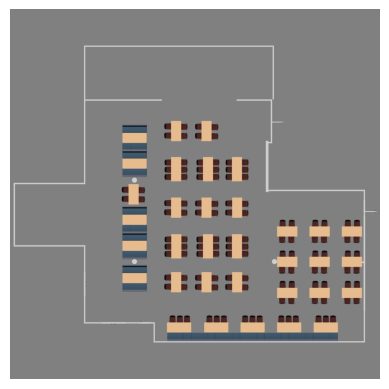

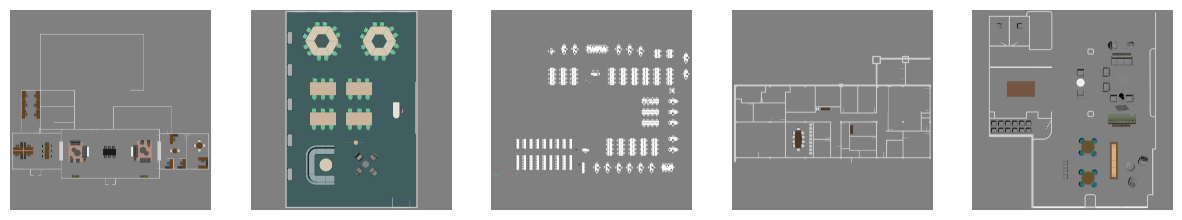

In [53]:
# User inputs an image
image_paths = data_valid_na['image_path'].tolist()
#user_image_path = input("Enter the path of your image: ")
user_image_path = r'D:\School\Steelcase Capstone\Total_Images\0a14edbeff34447a88acda602f872614\0a14edbeff34447a88acda602f872614_Top.png'

# Generate embedding for the user image
user_embedding = get_user_image_embedding(user_image_path, model)

img2 = mpimg.imread(user_image_path)
plt.imshow(img2)
plt.axis('off')

# Display the nearest neighbor images
calculate_nearest_neighbors(user_embedding, knn, image_paths)

### Gathering only valid class for streamlit demo

In [35]:
#data_valid = data.where(data['label']==1)
#data_valid
#data_valid_na = data_valid.dropna()
data_valid_na.image

1       [[[128, 128, 128], [128, 128, 128], [128, 128,...
4       [[[128, 128, 128], [128, 128, 128], [128, 128,...
12      [[[128, 128, 128], [128, 128, 128], [128, 128,...
20      [[[128, 128, 128], [128, 128, 128], [128, 128,...
34      [[[128, 128, 128], [128, 128, 128], [128, 128,...
                              ...                        
3369    [[[128, 128, 128], [128, 128, 128], [128, 128,...
3372    [[[128, 128, 128], [128, 128, 128], [128, 128,...
3376    [[[128, 128, 128], [128, 128, 128], [128, 128,...
3379    [[[128, 128, 128], [128, 128, 128], [128, 128,...
3392    [[[128, 128, 128], [128, 128, 128], [128, 128,...
Name: image, Length: 384, dtype: object

In [36]:
new_data.image

0       [[[128 128 128]\n  [128 128 128]\n  [128 128 1...
1       [[[128 128 128]\n  [128 128 128]\n  [128 128 1...
2       [[[128 128 128]\n  [128 128 128]\n  [128 128 1...
3       [[[128 128 128]\n  [128 128 128]\n  [128 128 1...
4       [[[128 128 128]\n  [128 128 128]\n  [128 128 1...
                              ...                        
3408    [[[128 128 128]\n  [128 128 128]\n  [128 128 1...
3409    [[[128 128 128]\n  [128 128 128]\n  [128 128 1...
3410    [[[128 128 128]\n  [128 128 128]\n  [128 128 1...
3411    [[[128 128 128]\n  [128 128 128]\n  [128 128 1...
3412    [[[128 128 128]\n  [128 128 128]\n  [128 128 1...
Name: image, Length: 3413, dtype: object

In [28]:
#embeddings_valid = process_images(data_valid_na.image, model, batch_size=32)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  8%|██████▉                                                                            | 1/12 [00:01<00:18,  1.64s/it]

1/1 [==============================] - 1s 1s/step


 17%|█████████████▊                                                                     | 2/12 [00:03<00:15,  1.58s/it]

1/1 [==============================] - 1s 1s/step


 25%|████████████████████▊                                                              | 3/12 [00:04<00:14,  1.56s/it]

1/1 [==============================] - 1s 1s/step


 33%|███████████████████████████▋                                                       | 4/12 [00:06<00:12,  1.54s/it]

1/1 [==============================] - 1s 1s/step


 42%|██████████████████████████████████▌                                                | 5/12 [00:07<00:10,  1.53s/it]

1/1 [==============================] - 1s 1s/step


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:09<00:09,  1.53s/it]

1/1 [==============================] - 1s 1s/step


 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:10<00:07,  1.52s/it]

1/1 [==============================] - 1s 1s/step


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:12<00:06,  1.52s/it]

1/1 [==============================] - 1s 1s/step


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:13<00:04,  1.52s/it]

1/1 [==============================] - 1s 1s/step


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [00:15<00:03,  1.53s/it]

1/1 [==============================] - 1s 1s/step


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:16<00:01,  1.53s/it]

1/1 [==============================] - 1s 1s/step


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:18<00:00,  1.54s/it]


In [48]:
embeddings_df_valid = pd.DataFrame(embeddings_valid)
embed_df_val_nump = embeddings_df_valid.to_numpy()

In [54]:
#embeddings_df_valid.to_csv(r'D:\School\Steelcase Capstone\Embeddings_valid.csv')

In [55]:
data_valid_na.to_csv(r'D:\School\Steelcase Capstone\floorplan_dataset_valid.csv')